In [92]:
import pandas as pd
df = pd.read_csv(r'C:\Users\91638\Downloads\Test.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [93]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [95]:
# Handle missing values if necessary
df = df.dropna()
# Print column names to check for correct naming
print(df.columns)



Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')


In [96]:
print(df.isnull().sum())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [97]:
df = df.dropna(subset=['Spending_Score'])

In [98]:
print(df.isnull().sum())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [99]:
# Convert Gender to numeric values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [100]:
# Convert Gender to numeric values
df['Spending_Score'] = df['Spending_Score'].map({'Low': 0, 'High': 1})

In [101]:
# Select relevant features
X = df[['Age', 'Gender', 'Spending_Score','Family_Size']]

In [102]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [103]:
import numpy as np
np.isnan(X_scaled).any()

True

In [104]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)


In [105]:
from sklearn.cluster import KMeans

# Apply K-means with a chosen number of clusters (say, 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled_imputed)

# Add the cluster labels to the original dataset
df['Cluster'] = y_kmeans


C:\Users\91638\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [106]:
df_clean = df.dropna()
X_scaled_clean = X_scaled[~np.isnan(X_scaled).any(axis=1)]


In [107]:
from sklearn.cluster import KMeans

# Reapply K-means with the cleaned data
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled_clean)


C:\Users\91638\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [108]:
df_clean['Cluster'] = y_kmeans


<ipython-input-108-1974cfa90192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = y_kmeans


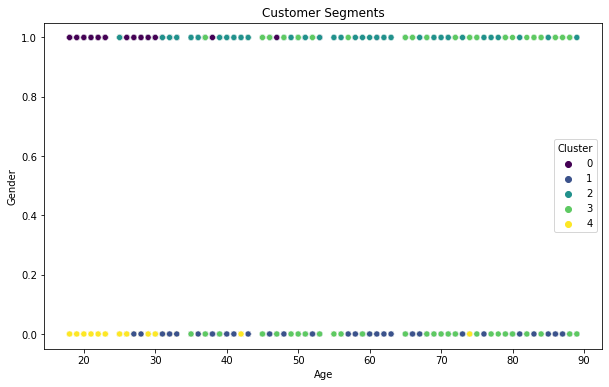

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters (assuming 2 features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['Age'], y=df_clean['Gender'], hue=df_clean['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()


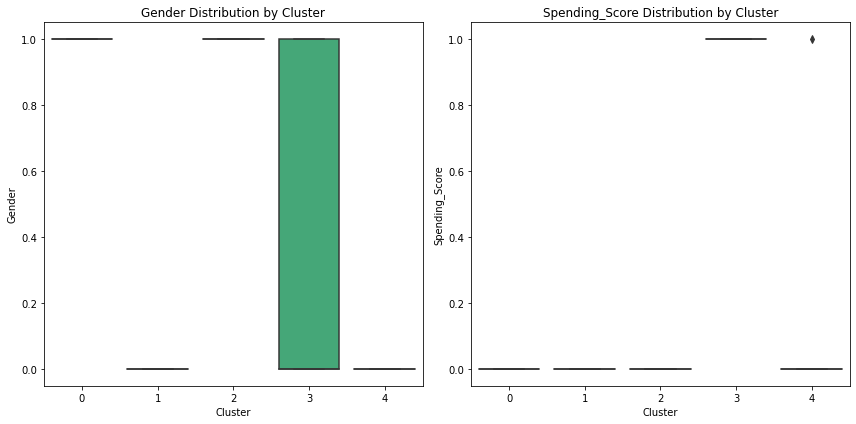

In [110]:
plt.figure(figsize=(12, 6))

# Box plot for Gender by Cluster
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['Cluster'], y=df_clean['Gender'], palette='viridis')
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gender')

# Box plot for Spending_Score by Cluster (if Gender is numerical; if categorical, adjust accordingly)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Cluster'], y=df_clean['Spending_Score'], palette='viridis')
plt.title('Spending_Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending_Score')

plt.tight_layout()
plt.show()

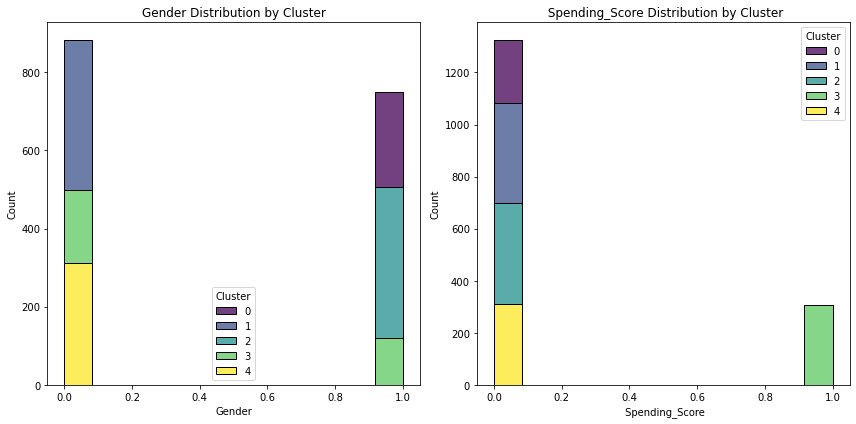

In [111]:
plt.figure(figsize=(12, 6))

# Histogram for Gender by Cluster
plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x='Gender', hue='Cluster', multiple='stack', palette='viridis')
plt.title('Gender Distribution by Cluster')
plt.xlabel('Gender')
plt.ylabel('Count')

# Histogram for Spending_Score by Cluster (if Spending_Score is numerical; if categorical, adjust accordingly)
plt.subplot(1, 2, 2)
sns.histplot(data=df_clean, x='Spending_Score', hue='Cluster', multiple='stack', palette='viridis')
plt.title(' Spending_Score Distribution by Cluster')
plt.xlabel(' Spending_Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [112]:
print(df_clean.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Cluster'],
      dtype='object')


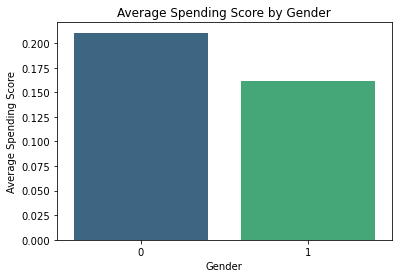

In [113]:
# Example: Adjust to the actual column name
# Let's assume the correct column name is 'Spending_Score'
sns.barplot(x='Gender', y='Spending_Score', data=df_clean, palette='viridis', ci=None)
plt.title('Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.show()


In [114]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the cleaned data
score = silhouette_score(X_scaled_clean, df_clean['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.42
